### Section 16 Data Analysis: lateral bending modes

These test steps were conducted on the afternoon of 2/26/25 (X bending modes 1-6), then most of the day on 2/27/25 (X bending modes 7-10 and Y bending modes 1-10).
Y bending modes 4 and 9 were remeasured on 2/28/25 to check measurement repeatability.

In [1]:
import numpy as np
import pandas as pd
import scipy.io

import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../')
from M1S_tools import *
import glob

plt.set_cmap('jet')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
## bending modes & influence matrices etc from Buddy #####################
ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991
## bending modes & influence matrices etc from Trupti #####################
N actuators =  170
/Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/influnce_matrix_files/OA_influence_matrices_all/OA_surface_normal_165SA_09Jan2025/
Afz =  (27547, 165)
U matrix (27547, 165)
S matrix (165, 165)

<Figure size 640x480 with 0 Axes>

2/26/25: Afx, Afy handled by M1S_tools.py. See output above. 

UxMat VxMat etc are not, because they are not needed by most notebooks

In [2]:
dataFolder = '/Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents' +\
    '/influnce_matrix_files/OA_influence_matrices_all/OA_surface_normal_165SA_XYBM_%s/'%TRDate

#read Fx Bending Modes & forces
df = pd.read_csv(dataFolder+'Ux_norm-nohp-%s-%s-%s.csv'%(TRDate[:2],TRDate[2:5],TRDate[5:]), header=None)
UxMat = np.array(df)
print('Ux matrix', UxMat.shape)
df = pd.read_csv(dataFolder+'Vx_norm-nohp-%s-%s-%s.csv'%(TRDate[:2],TRDate[2:5],TRDate[5:]), header=None)
VxMat = np.array(df)
print('Vx matrix', VxMat.shape)
df = pd.read_csv(dataFolder+'Sx_norm-nohp-%s-%s-%s.csv'%(TRDate[:2],TRDate[2:5],TRDate[5:]), header=None)
SxMat = np.array(df)
print('Sx matrix', SxMat.shape)

#read Fy Bending Modes & forces
df = pd.read_csv(dataFolder+'Uy_norm-nohp-%s-%s-%s.csv'%(TRDate[:2],TRDate[2:5],TRDate[5:]), header=None)
UyMat = np.array(df)
print('Uy matrix', UyMat.shape)
df = pd.read_csv(dataFolder+'Vy_norm-nohp-%s-%s-%s.csv'%(TRDate[:2],TRDate[2:5],TRDate[5:]), header=None)
VyMat = np.array(df)
print('Vy matrix', VyMat.shape)
df = pd.read_csv(dataFolder+'Sy_norm-nohp-%s-%s-%s.csv'%(TRDate[:2],TRDate[2:5],TRDate[5:]), header=None)
SyMat = np.array(df)
print('Sy matrix', SyMat.shape)

Ux matrix (27547, 85)
Vx matrix (165, 85)
Sx matrix (85, 85)
Uy matrix (27547, 85)
Vy matrix (165, 85)
Sy matrix (85, 85)


In [3]:
_,_ = parse_ml_data_folder('%s/Sec 16/250227/'%(ml_data_dir))

Thu Feb 27 09:28:59 2025 	 250227 GMT3 set1 16.2 4 initial X gmtMorph170614 -.h5
Thu Feb 27 09:47:45 2025 	 250227 GMT3 set1 16.2 5-7 lateral X bm7+ gmtMorph170614 -.h5
Thu Feb 27 09:52:00 2025 	 250227 GMT3 set1 16.2 5-7 lateral X bm7- gmtMorph170614 -.h5
Thu Feb 27 09:55:23 2025 	 250227 GMT3 set2 16.2 5-7 lateral X bm7- gmtMorph170614 -.h5
Thu Feb 27 09:59:23 2025 	 250227 GMT3 set2 16.2 5-7 lateral X bm7+ gmtMorph170614 -.h5
Thu Feb 27 10:05:11 2025 	 250227 GMT3 set1 16.2 5-7 lateral X bm8+ gmtMorph170614 -.h5
Thu Feb 27 10:09:31 2025 	 250227 GMT3 set1 16.2 5-7 lateral X bm8- gmtMorph170614 -.h5
Thu Feb 27 10:12:54 2025 	 250227 GMT3 set2 16.2 5-7 lateral X bm8- gmtMorph170614 -.h5
Thu Feb 27 10:17:11 2025 	 250227 GMT3 set2 16.2 5-7 lateral X bm8+ gmtMorph170614 -.h5
Thu Feb 27 10:23:27 2025 	 250227 GMT3 set1 16.2 5-7 lateral X bm9+ gmtMorph170614 -.h5
Thu Feb 27 10:27:42 2025 	 250227 GMT3 set1 16.2 5-7 lateral X bm9- gmtMorph170614 -.h5
Thu Feb 27 10:31:06 2025 	 250227 GMT3 

In [4]:
#dateID = '250117' not using dateID. b/c the BMs were split onto quite a few days
TcompString = '' #default, no T compensation
#TcompString = 'comp'

In [5]:
#useReMeasured = True
useReMeasured = False

useReMeasured_fixSDT = True
#useReMeasured_fixSDT = False

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 16/250227/250227 GMT3 set1 16.2 5-7 lateral Y bm1+ gmtMorph170614 -.h5: Thu Feb 27 11:37:23 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 16/250227/250227 GMT3 set1 16.2 5-7 lateral Y bm1- gmtMorph170614 -.h5: Thu Feb 27 11:41:33 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 16/250227/250227 GMT3 set2 16.2 5-7 lateral Y bm1- gmtMorph170614 -.h5: Thu Feb 27 11:44:57 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 16/250227/250227 GMT3 set2 16.2 5-7 lateral Y bm1+ gmtMorph170614 -.h5: Thu Feb 27 11:49:13 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 16/250227/250227 GMT3 set1 16.2 5-7 lateral Y bm2+ gmtMorph170614 -.h5: Thu Feb 27 11:53:56 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 16/250227/250227 GMT3 set1 16.2 5-7 lateral Y bm2- gmtMorph170614 -.h5: Thu Feb 27 11:58:24 2025 
/Users/bxin/GMT_

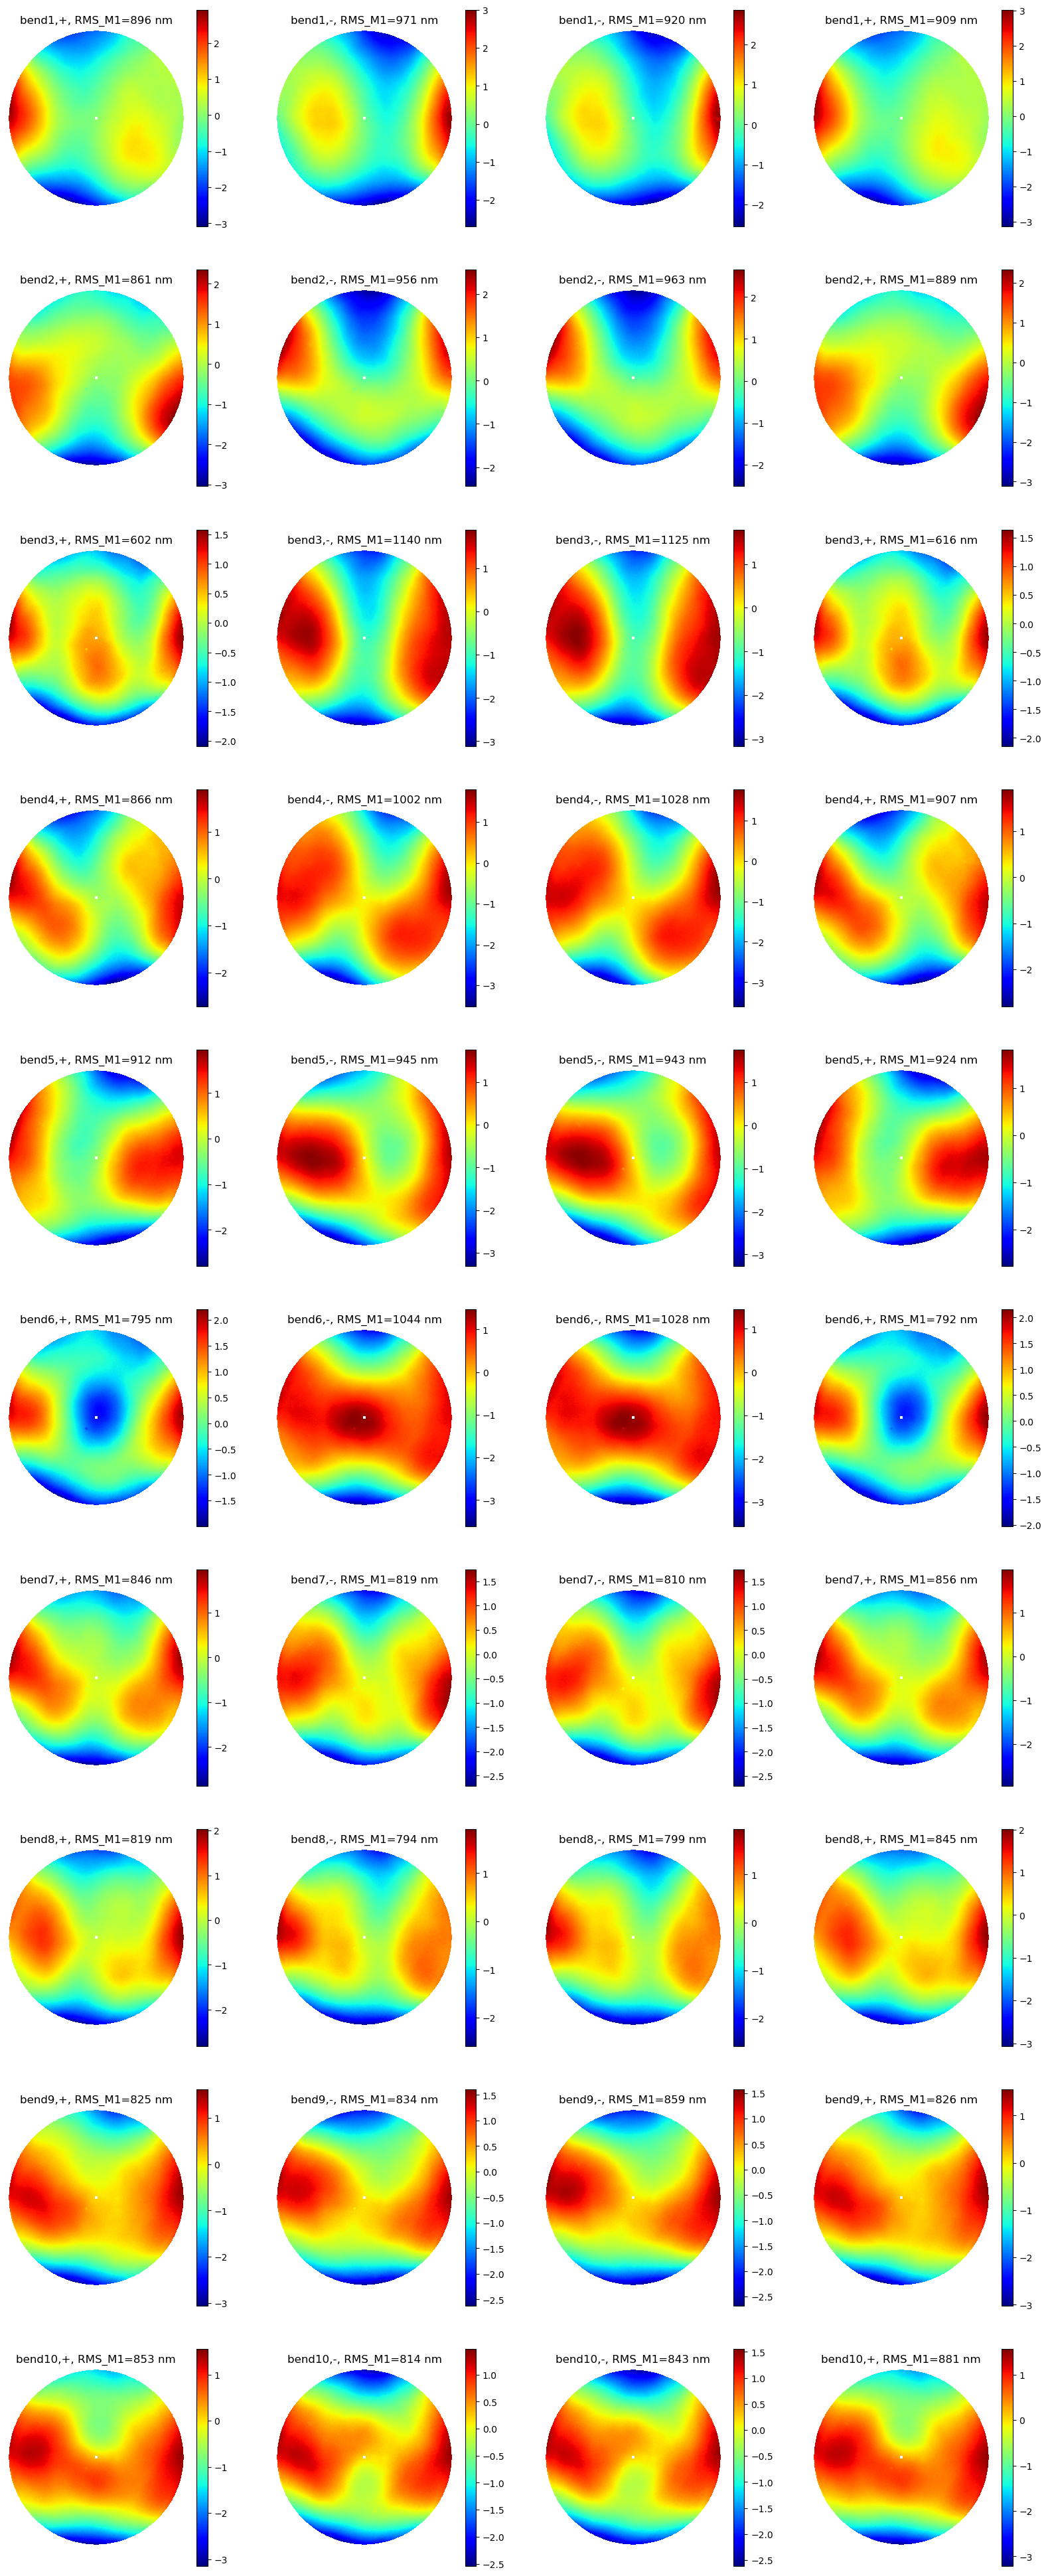

In [7]:
#look at all the +--+ maps, everything in h5 CS
startmode = 1
endmode = 10
nmode = endmode - startmode+1
ts_array = []
fig, ax = plt.subplots(nmode,4,figsize=(20,5*nmode))
i = 0
for modeID in range(startmode,endmode+1):
    signedBend = ['set1*bm%d+'%modeID, 'set1*bm%d-'%modeID, 'set2*bm%d-'%modeID, 'set2*bm%d+'%modeID]
    for bend in signedBend:
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1
        
        if modeID in [1,2,3,4,5,6, 7,8,9,10]:
            globstring = '%s/Sec 16/250227/*%s*.h5'%(ml_data_dir, bend) #not using dateID. 
        globstring = globstring.replace('*bm', '*Y bm')
            
        #print('??  ', globstring)
        fileset = sorted(glob.glob(globstring))
        assert len(fileset)==1
        m1s,centerRow,centerCol,pixelSize, ts = readH5Map(fileset)
        ts_array.append(ts)
        m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm

        img = ax[irow][icol].imshow(m1s, origin='lower')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('bend%d,%s, RMS_M1=%.0f nm'%(modeID, bend[-1], m1rms))
        ax[irow][icol].axis('off')

In [8]:
len(ts_array)/4

10.0

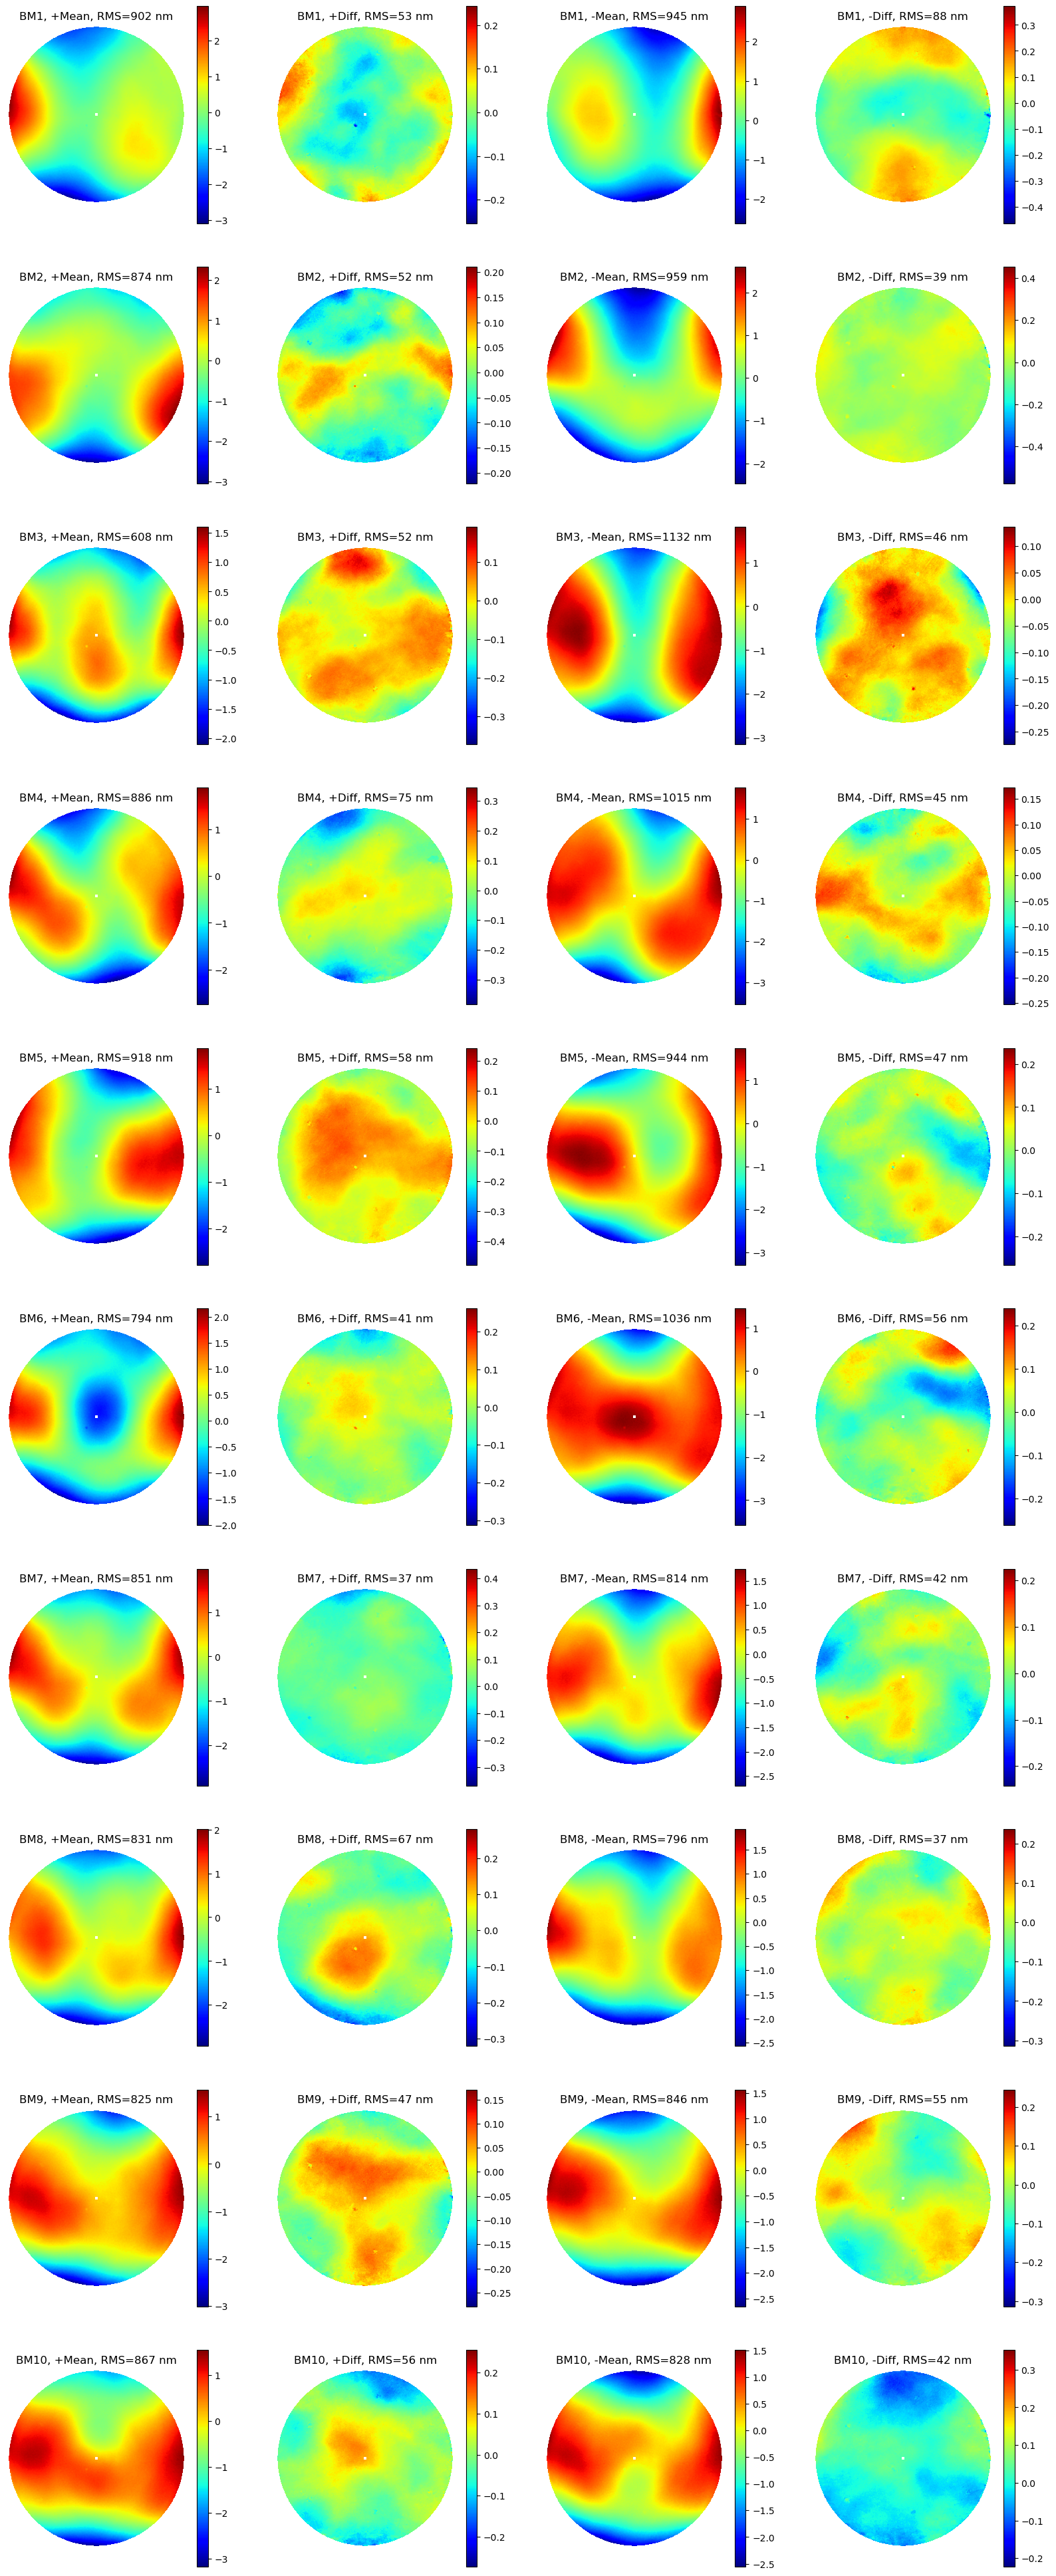

In [9]:
#look at average and diff of each ++ pair and each -- pair; all in h5 CS
stats = np.zeros((4, nmode))
fig, ax = plt.subplots(nmode,4,figsize=(20,5*nmode))
i = 0
for modeID in range(startmode,endmode+1):

    aveplus = np.zeros_like(m1s)
    aveminus = np.zeros_like(m1s)
    diffplus = np.zeros_like(m1s)
    diffminus = np.zeros_like(m1s)
    signedBend = ['set1*bm%d+'%modeID, 'set1*bm%d-'%modeID, 'set2*bm%d-'%modeID, 'set2*bm%d+'%modeID]
    signshort = '+--+'
    for bend in signedBend:

        if modeID in [1,2,3,4,5,6, 7,8,9,10]:
            globstring = '%s/Sec 16/250227/*%s*.h5'%(ml_data_dir, bend) #not using dateID. 
        globstring = globstring.replace('*bm', '*Y bm')

        #print(globstring)
        fileset = sorted(glob.glob(globstring))
        #print(fileset)
        assert len(fileset)==1
        m1s,centerRow,centerCol,pixelSize, ts = readH5Map(fileset, verbose=False)
        if '+' in bend:
            aveplus += m1s
            if 'set1' in bend:
                diffplus -= m1s
            else:
                diffplus += m1s #set2 - set1
                aveplus /= 2
        else:
            aveminus += m1s
            if 'set1' in bend:
                diffminus -= m1s
            else:
                diffminus += m1s
                aveminus /= 2
    for j in range(4):
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1
        if j==0:
            m1s = aveplus
            img = ax[irow][icol].imshow(m1s, origin='lower')
            fig.colorbar(img, ax=ax[irow][icol])
            m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
            mytitle = 'BM%d, +Mean, RMS=%.0f nm'%(modeID, m1rms)
        elif j==1:
            m1s = diffplus
            img = ax[irow][icol].imshow(m1s, origin='lower')
            fig.colorbar(img, ax=ax[irow][icol])
            m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
            mytitle = 'BM%d, +Diff, RMS=%.0f nm'%(modeID, m1rms)           
        elif j==2:
            m1s = aveminus
            img = ax[irow][icol].imshow(m1s, origin='lower')
            fig.colorbar(img, ax=ax[irow][icol])
            m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
            mytitle = 'BM%d, -Mean, RMS=%.0f nm'%(modeID, m1rms)
        elif j==3:
            m1s = diffminus
            img = ax[irow][icol].imshow(m1s, origin='lower')
            fig.colorbar(img, ax=ax[irow][icol])
            m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
            mytitle = 'BM%d, -Diff, RMS=%.0f nm'%(modeID, m1rms)  
        ax[irow][icol].set_title(mytitle)
        ax[irow][icol].axis('off')
        stats[j, modeID-1-startmode+1] = m1rms

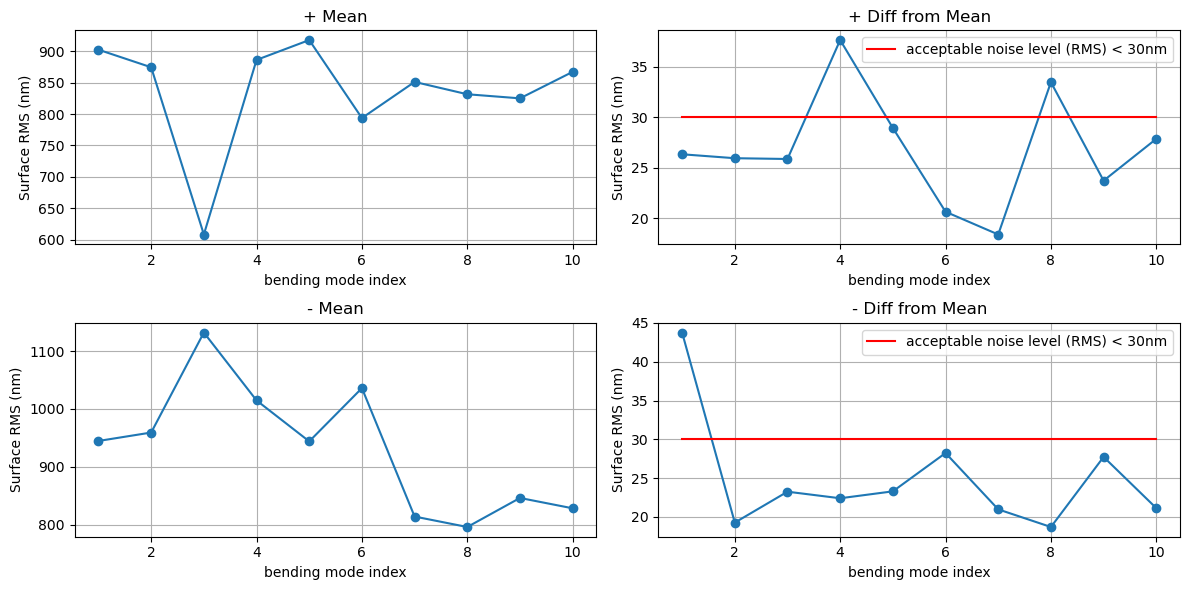

In [10]:
fig, ax = plt.subplots(2,2,figsize=(12, 6))
x0 = np.arange(startmode, endmode+1)
i = 0
j = 0
ax[i][j].plot(x0, stats[0,:],'-o')
ax[i][j].grid()
ax[i][j].set_xlabel('bending mode index')
ax[i][j].set_title('+ Mean')
ax[i][j].set_ylabel('Surface RMS (nm)')
i = 0
j = 1
ax[i][j].plot(x0, stats[j,:]/2,'-o')
ax[i][j].plot([startmode, endmode],[30,30],'-r', label='acceptable noise level (RMS) < 30nm')
ax[i][j].grid()
ax[i][j].legend(loc='upper right')
ax[i][j].set_xlabel('bending mode index')
ax[i][j].set_title('+ Diff from Mean')
ax[i][j].set_ylabel('Surface RMS (nm)')
i = 1
j = 0
ax[i][j].plot(x0, stats[2,:],'-o')
ax[i][j].grid()
ax[i][j].set_xlabel('bending mode index')
ax[i][j].set_title('- Mean')
ax[i][j].set_ylabel('Surface RMS (nm)')
i = 1
j = 1
ax[i][j].plot(x0, stats[3,:]/2,'-o')
ax[i][j].plot([startmode, endmode],[30,30],'-r', label='acceptable noise level (RMS) < 30nm')
ax[i][j].grid()
ax[i][j].legend(loc='upper right')
ax[i][j].set_xlabel('bending mode index')
ax[i][j].set_title('- Diff from Mean')
ax[i][j].set_ylabel('Surface RMS (nm)')
plt.tight_layout()

### Now calculate the measured BMs; We go into M1B from this point on, b/c forces are in shown in M1B

In [12]:
bmMags = np.array([0.5, 0.5, 0.5, 0.5, 0.5,   0.5, 0.193, 0.178, 0.137, 0.178]) #for Y
# the Y magnitudes are quite a bit smaller than the X magnitude for modes >7.
# the actuator force limits for Y are quite a bit more restrictive than the ones for X forces.
#Dave explained that this is due to the asymmetry between x and y when the M1 cells are mounted on the telescope
#.   for example, for S1, large y forces are required to support against gravity when pointing at horizon.

In [13]:
print('\033[34mmode ID, magnitude (nm RMS)\033[0m')
for i, a in enumerate(bmMags):
    print('\033[34m%02d,      %.3f\033[0m'%(i+1, a))

mode ID, magnitude (nm RMS)
01,      0.500
02,      0.500
03,      0.500
04,      0.500
05,      0.500
06,      0.500
07,      0.193
08,      0.178
09,      0.137
10,      0.178


In [14]:
useReMeasured

False

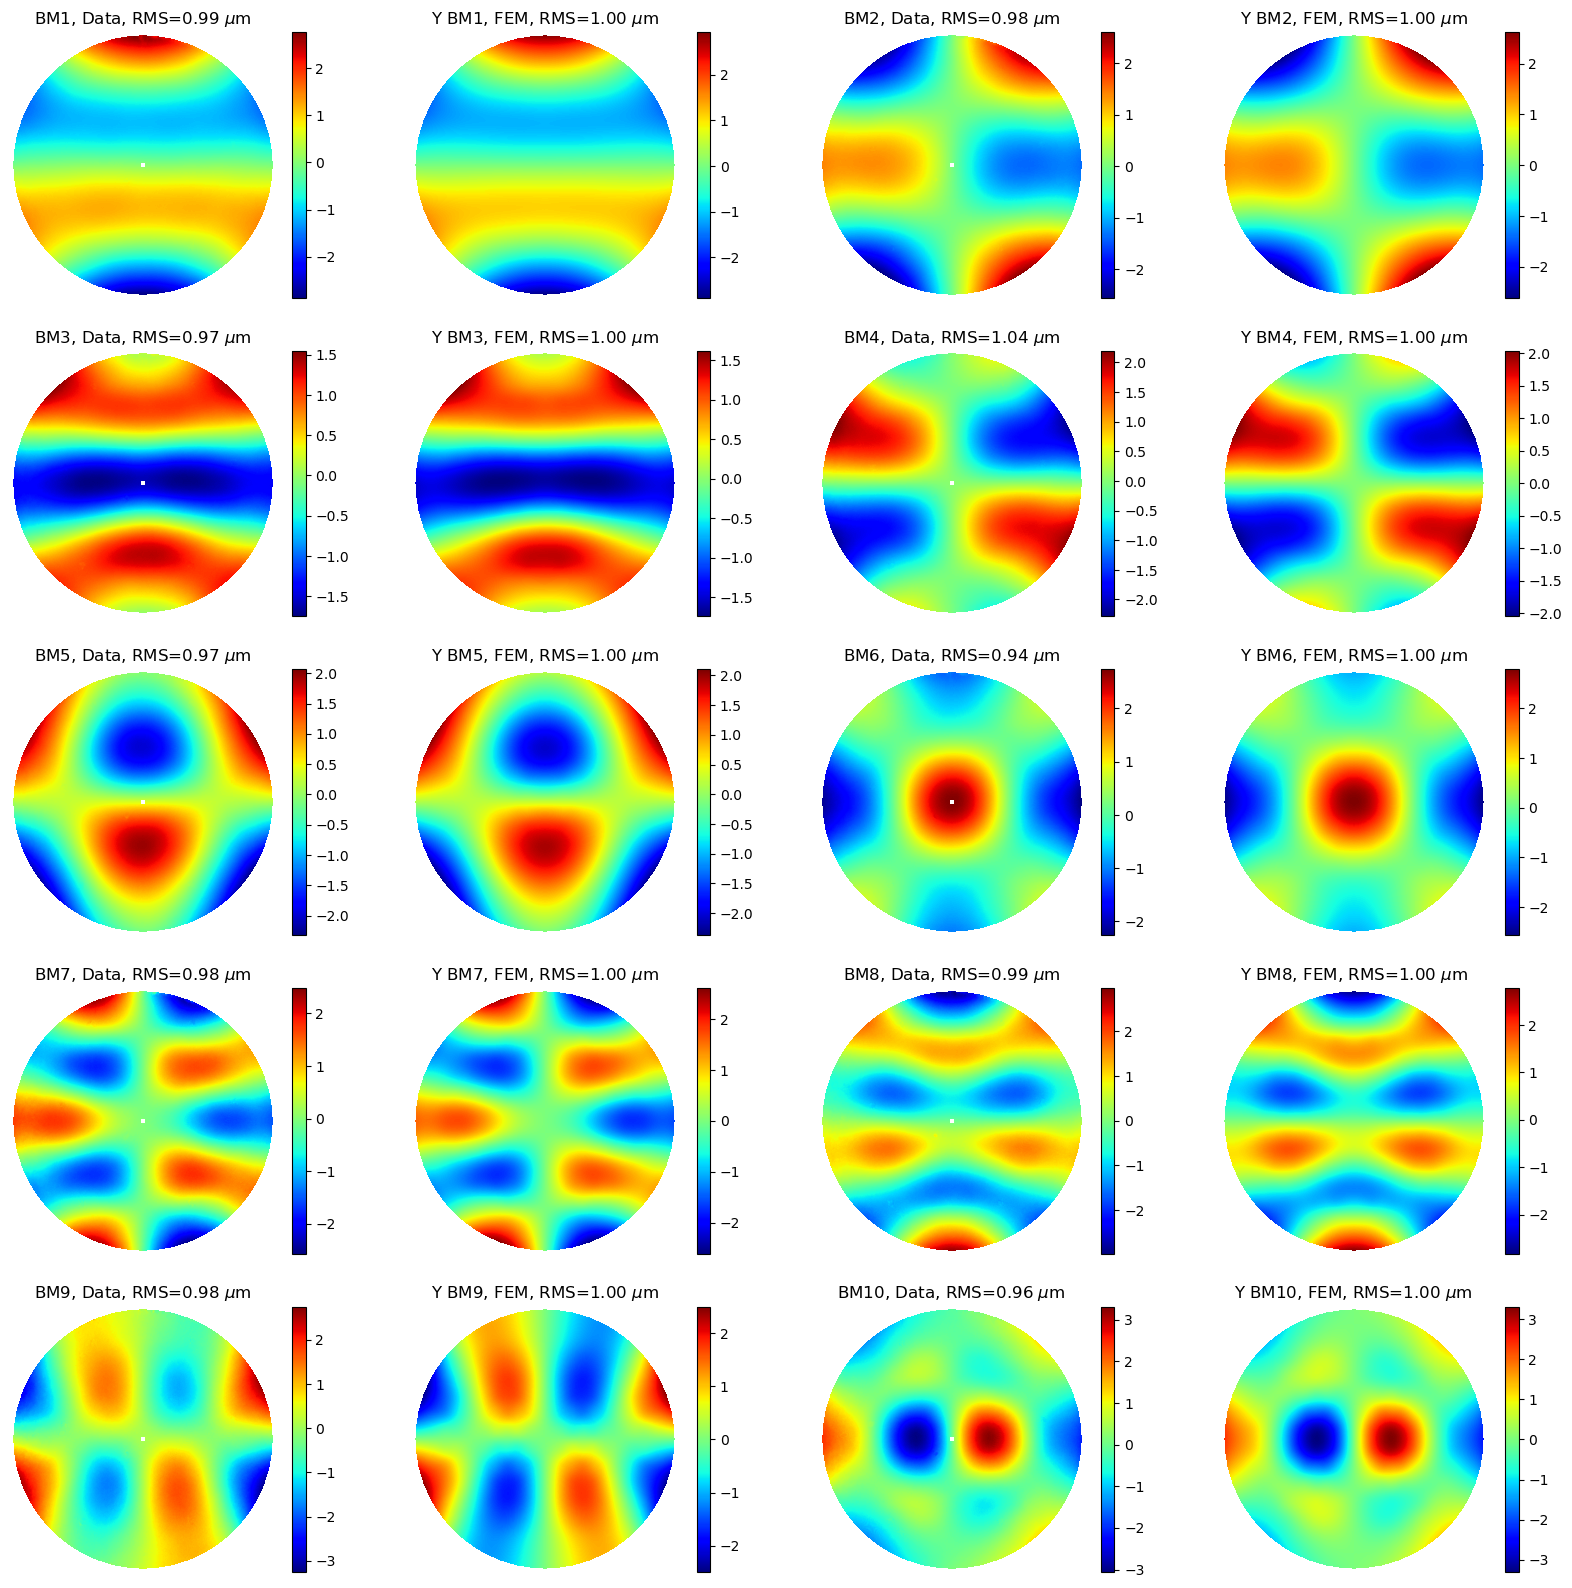

In [15]:
from scipy.interpolate import griddata

GMT_FEM = 1 #GMT FEM, used for side-by-side comparision with measured shapes

#ML FEM; at least visually, this doesn't seem to help; 
#The Afn_ml@VMat are not orthogonal, therefore cannot be used for decomposition.
#GMT_FEM = 0 #ML FEM

#[x1, y1] are the x and y grid in M1B. 
#CenterCol and centerRow are swapped, because they were meant for h5 CS
#Lines below, we will transpose the h5 map to match this.
#.  we will also reverse the sign of h5 maps to be in M1B.
[x1, y1] = mkXYGrid(m1s, centerCol, centerRow, pixelSize)

myBM = np.zeros((Sxn, Syn, nmode))
nrow = int(np.ceil(nmode/2.))
fig, ax = plt.subplots(nrow,4,figsize=(20,4*nrow))

i = 0
for modeID in range(startmode,endmode+1):

    signedBend = ['set1*bm%d+'%modeID, 'set1*bm%d-'%modeID, 'set2*bm%d-'%modeID, 'set2*bm%d+'%modeID]
    signshort = '+--+'    
    for bend in signedBend:
        
        if modeID in [1,2,3,4,5,6, 7,8,9,10]:
            globstring = '%s/Sec 16/250227/*%s*.h5'%(ml_data_dir, bend) #not using dateID. 
        globstring = globstring.replace('*bm', '*Y bm')

        #print(globstring)
        fileset = sorted(glob.glob(globstring))
        #print(fileset)
        assert len(fileset)==1
        m1s,centerRow,centerCol,pixelSize, ts = readH5Map(fileset, verbose=False)
        #m1s *= -1 # we are converting into M1B with myBM[] below
        if '+' in bend:
            myBM[:,:,modeID-startmode] += m1s
        else:
            myBM[:,:,modeID-startmode] -= m1s
    myBM[:,:,modeID-startmode] /= (4*bmMags[modeID-1]) #normalize to 1um RMS surfaces
    myBM[:,:,modeID-startmode] = -myBM[:,:,modeID-startmode].T #convert into M1B
    
    m1s = myBM[:,:,modeID-startmode]
    m1rms = np.std(m1s[~np.isnan(m1s)])

    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1
    
    img = ax[irow][icol].imshow(m1s, origin='lower')
    fig.colorbar(img, ax=ax[irow][icol])
    mytitle = r'BM%d, Data, RMS=%.2f $\mu$m'%(modeID, m1rms)
    ax[irow][icol].set_title(mytitle)
    ax[irow][icol].axis('off')
    
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1
    
    if GMT_FEM:
        aa = UyMat[:,modeID-1]
        m1rms = np.std(aa[~np.isnan(aa)])
        grid_z = griddata((nodex, nodey), UyMat[:,modeID-1], (x1,y1), method='linear')
    else:
        ss_mlgrid = Afn_ml @ gmt165Fvec2mlFvec(VMat[:,modeID-1]) * 1e-3
        m1rms = np.std(ss_mlgrid[~np.isnan(ss_mlgrid)])
        grid_z = griddata((np.squeeze(nodex_ml), np.squeeze(nodey_ml)), ss_mlgrid, (x1,y1), method='linear')
    #img = ax[irow][icol].scatter(nodex, nodey,10, UMat[:,modeID-1]) #scatter makes image sampling bad
    img = ax[irow][icol].imshow(grid_z, origin='lower')
    
    ax[irow][icol].set_title(r'Y BM%d, FEM, RMS=%.2f $\mu$m'%(modeID,m1rms))
    ax[irow][icol].axis('equal')
    ax[irow][icol].axis('off')
    fig.colorbar(img, ax=ax[irow][icol])
    
for i in range(nmode*2, nrow*4):
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    ax[irow][icol].axis('off')

In [16]:
bmMags[:endmode]

array([0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.193, 0.178, 0.137,
       0.178])

### Making the fits & derive xtalks

Y BM1, Scaling =0.992, Residual RMS = 0.047 micron (per 1 micron RMS expected)
Y BM2, Scaling =0.964, Residual RMS = 0.052 micron (per 1 micron RMS expected)
Y BM3, Scaling =0.967, Residual RMS = 0.043 micron (per 1 micron RMS expected)
Y BM4, Scaling =1.038, Residual RMS = 0.077 micron (per 1 micron RMS expected)
Y BM5, Scaling =0.968, Residual RMS = 0.071 micron (per 1 micron RMS expected)
Y BM6, Scaling =0.942, Residual RMS = 0.071 micron (per 1 micron RMS expected)
Y BM7, Scaling =0.975, Residual RMS = 0.091 micron (per 1 micron RMS expected)
Y BM8, Scaling =0.982, Residual RMS = 0.147 micron (per 1 micron RMS expected)
Y BM9, Scaling =0.939, Residual RMS = 0.271 micron (per 1 micron RMS expected)
Y BM10, Scaling =0.956, Residual RMS = 0.121 micron (per 1 micron RMS expected)
scaling factor <1 means mirror stiffer than FEM, i.e., model too soft.


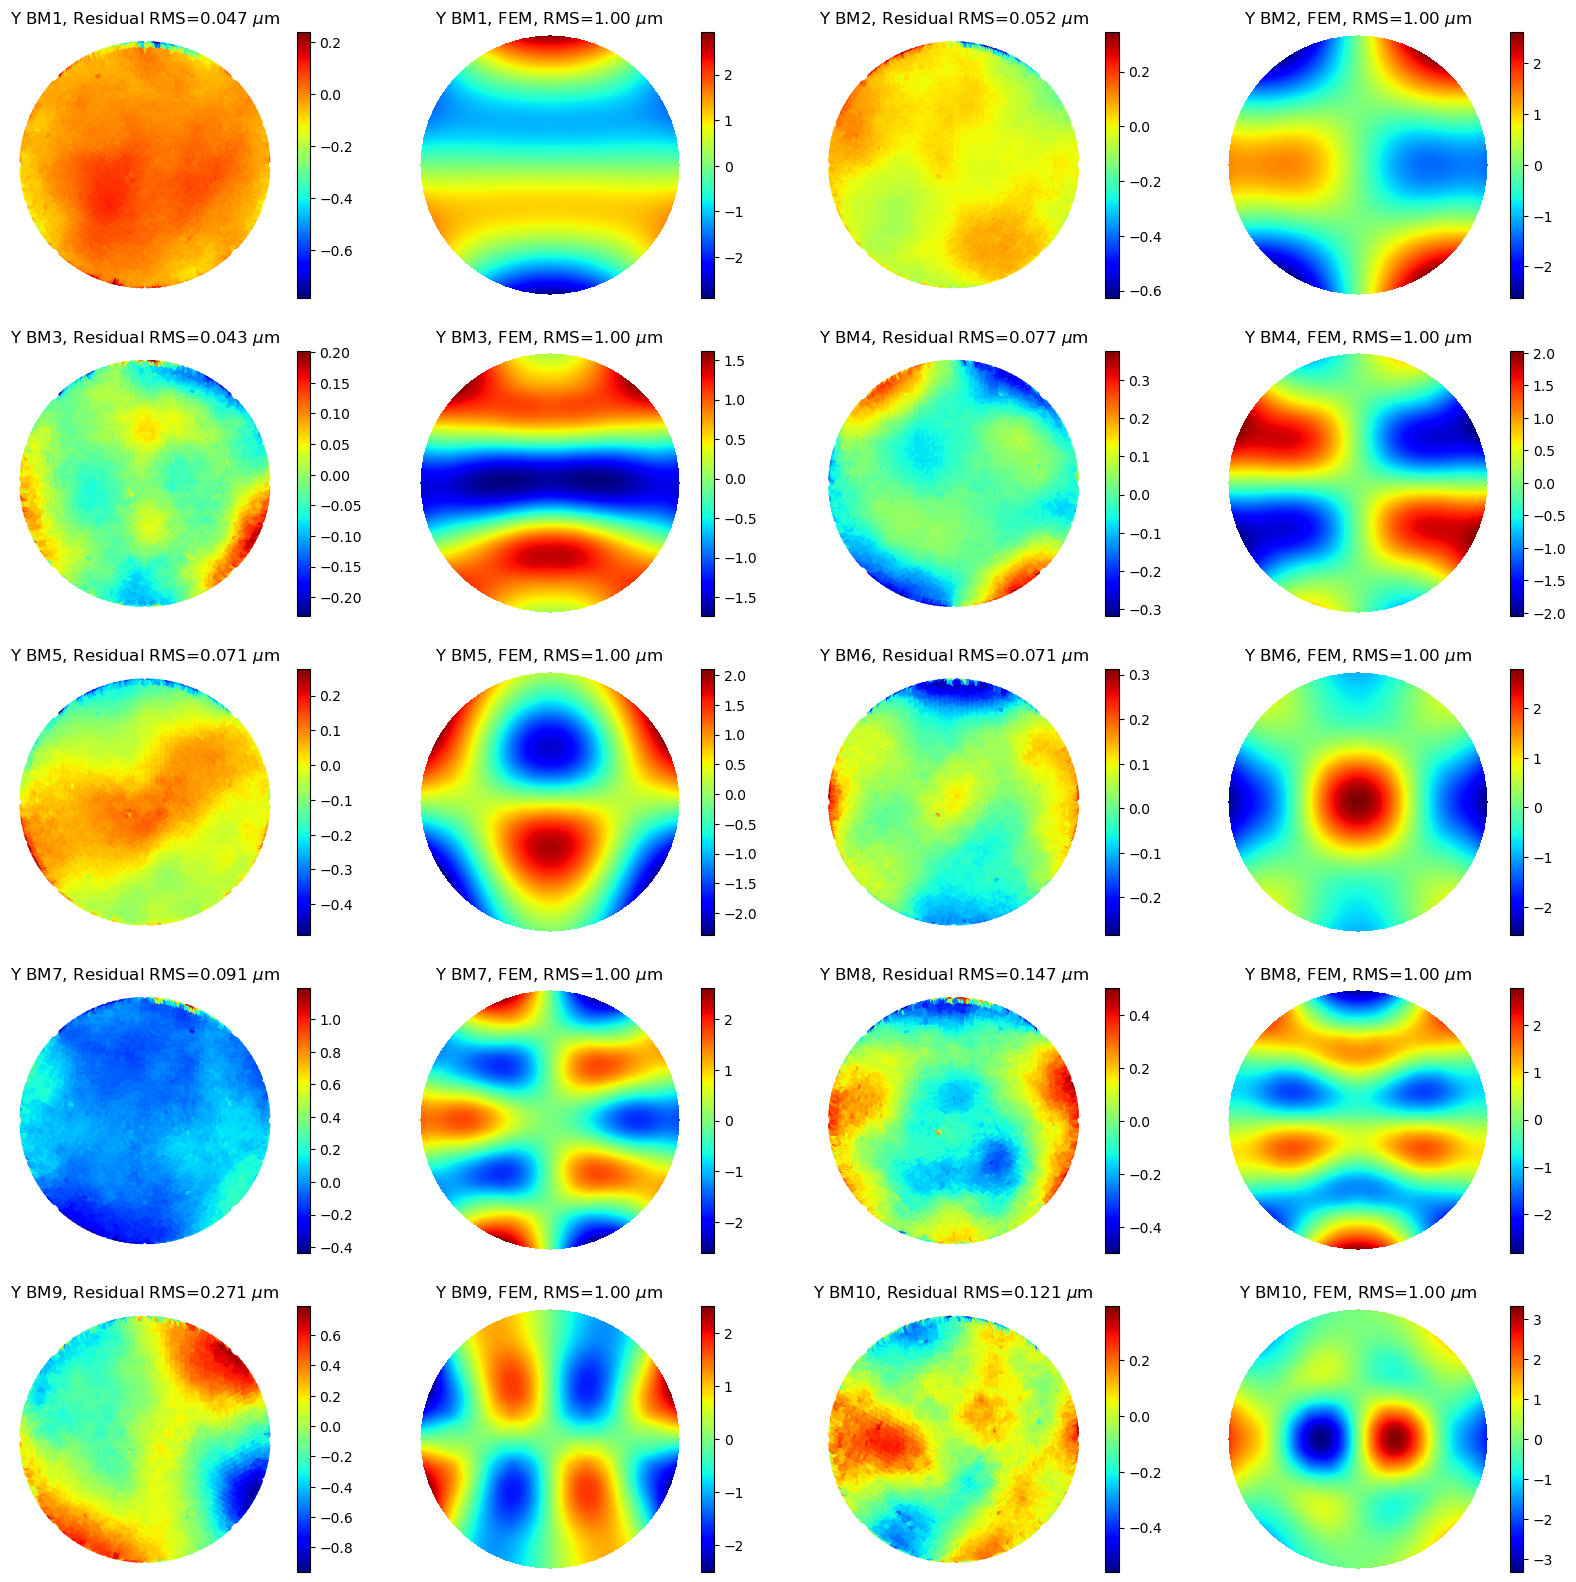

In [17]:
#This takes ~ minutes to run
from scipy.interpolate import LinearNDInterpolator 

nfitmode = 83
xtalk = np.zeros((nfitmode, endmode))

nrow = np.max((int(np.ceil(nmode/2.)),2)) #minimum 2 rows, or ax[irow][icol] won't work
fig, ax = plt.subplots(nrow,4,figsize=(20,4*nrow))
i = 0
for modeID in range(startmode,endmode+1):
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1

    bm2d = np.squeeze(myBM[:,:,modeID-1-startmode+1]) #myIF is already in M1B, in nm
    mask = ~np.isnan(bm2d)

    interp = LinearNDInterpolator(list(zip(x1[mask], y1[mask])), bm2d[mask], fill_value=np.nan)
    mapOntoGMTFEgrid = interp(nodex, nodey).ravel()
    validIdx = ~np.isnan(mapOntoGMTFEgrid)
    xtalk[:,modeID-1] = UyMat[validIdx,:nfitmode].transpose() /np.sum(validIdx)  @ mapOntoGMTFEgrid[validIdx] #all in micron
    #residual = mapOntoGMTFEgrid - UMat[:,:nfitmode] @ xtalk[:, modeID-1] #this is residual in micron
    #only subtract that one mode
    residual = mapOntoGMTFEgrid - UyMat[:,modeID-1] * xtalk[modeID-1, modeID-1] #this is residual in micron
    
    m1rms = np.std(residual[~np.isnan(residual)]) #in micron
    mytitle = r'Y BM%d, Scaling =%.3f, Residual RMS = %.3f micron (per 1 micron RMS expected)'%(modeID, 
                                                                        np.max(xtalk[:,modeID-1]),
                                                                        m1rms)
    print(mytitle)
    img = ax[irow][icol].scatter(nodex, nodey, 10, residual)
    fig.colorbar(img, ax=ax[irow][icol])
    mytitle = r'Y BM%d, Residual RMS=%.3f $\mu$m'%(modeID, m1rms)

    ax[irow][icol].set_title(mytitle)
    
    ###
    
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1
    
    if GMT_FEM:
        aa = UyMat[:,modeID-1]
        m1rms = np.std(aa[~np.isnan(aa)])
        grid_z = griddata((nodex, nodey), UyMat[:,modeID-1], (x1,y1), method='linear')
    else:
        ss_mlgrid = Afn_ml @ gmt165Fvec2mlFvec(VMat[:,modeID-1]) * 1e-3
        m1rms = np.std(ss_mlgrid[~np.isnan(ss_mlgrid)])
        grid_z = griddata((np.squeeze(nodex_ml), np.squeeze(nodey_ml)), ss_mlgrid, (x1,y1), method='linear')
    #img = ax[irow][icol].scatter(nodex, nodey,10, UMat[:,modeID-1]) #scatter makes image sampling bad
    img = ax[irow][icol].imshow(grid_z, origin='lower')
    
    ax[irow][icol].set_title(r'Y BM%d, FEM, RMS=%.2f $\mu$m'%(modeID,m1rms))
    ax[irow][icol].axis('equal')
    fig.colorbar(img, ax=ax[irow][icol])
    
for i in range(nrow*4):
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    ax[irow][icol].axis('off')
print('scaling factor <1 means mirror stiffer than FEM, i.e., model too soft.')

Y Bending Mode 1, Scaling =0.992, Residual RMS = 0.047 micron (per 1 micron RMS expected)
Y Bending Mode 2, Scaling =0.964, Residual RMS = 0.052 micron (per 1 micron RMS expected)
Y Bending Mode 3, Scaling =0.967, Residual RMS = 0.043 micron (per 1 micron RMS expected)
Y Bending Mode 4, Scaling =1.038, Residual RMS = 0.077 micron (per 1 micron RMS expected)
Y Bending Mode 5, Scaling =0.968, Residual RMS = 0.071 micron (per 1 micron RMS expected)
Y Bending Mode 6, Scaling =0.942, Residual RMS = 0.071 micron (per 1 micron RMS expected)
Y Bending Mode 7, Scaling =0.975, Residual RMS = 0.091 micron (per 1 micron RMS expected)
Y Bending Mode 8, Scaling =0.982, Residual RMS = 0.147 micron (per 1 micron RMS expected)
Y Bending Mode 9, Scaling =0.939, Residual RMS = 0.271 micron (per 1 micron RMS expected)
Y Bending Mode 10, Scaling =0.956, Residual RMS = 0.121 micron (per 1 micron RMS expected)


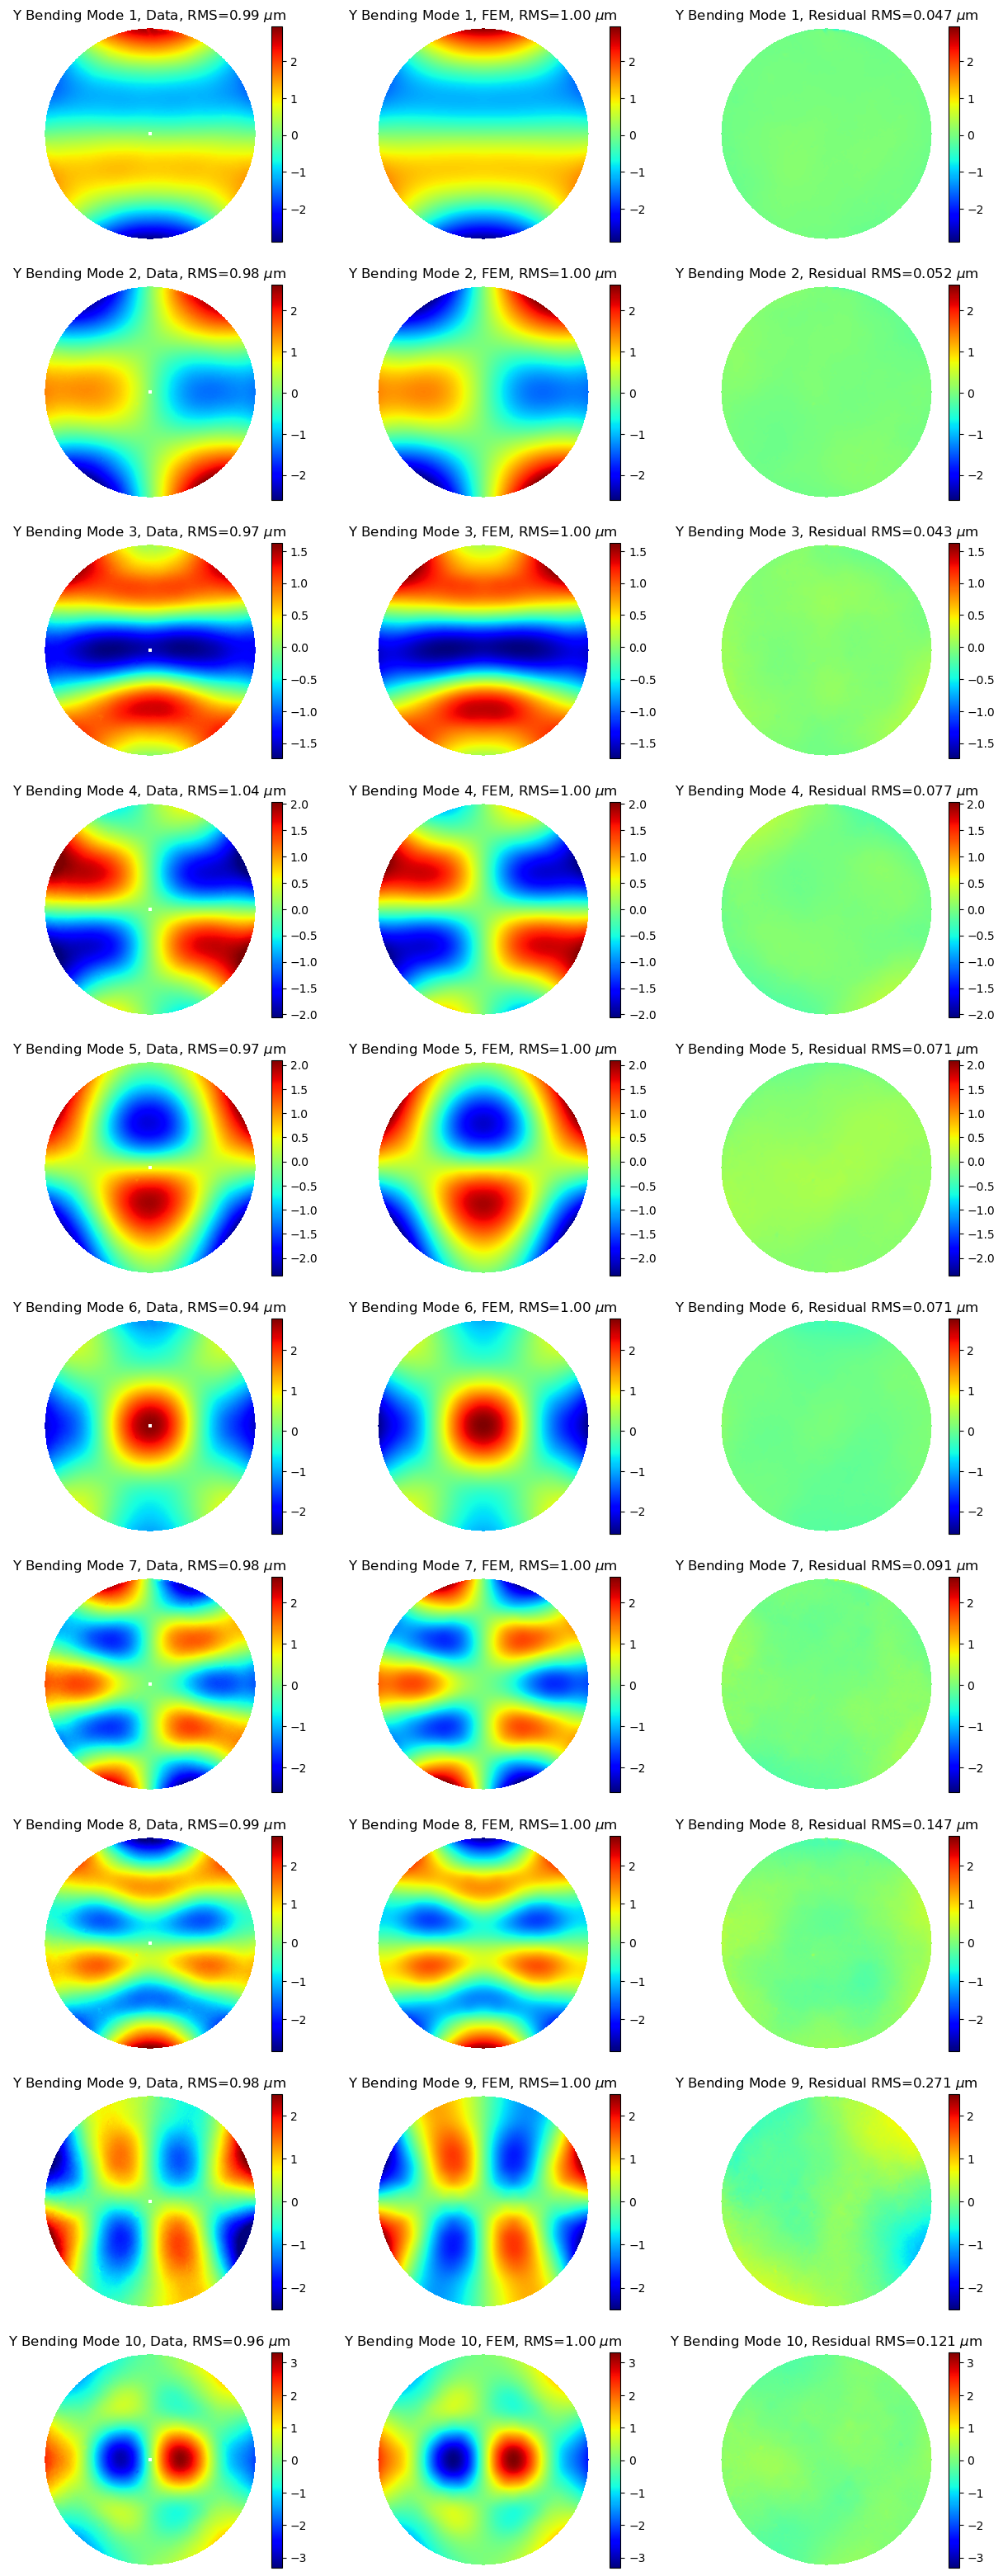

In [22]:
#make plots for the final report
xtalk = np.zeros((nfitmode, endmode))

nrow = np.max((int(np.ceil(nmode)),2)) #minimum 2 rows, or ax[irow][icol] won't work
fig, ax = plt.subplots(nrow,3,figsize=(15,4*nrow))

for modeID in range(startmode,endmode+1):
    irow = np.int8(modeID-startmode)

    #--------------FEM
    icol =1 
    aa = UMat[:,modeID-1]
    m1rms = np.std(aa[~np.isnan(aa)])
    grid_z = griddata((nodex, nodey), UyMat[:,modeID-1], (x1,y1), method='linear')
    
    img = ax[irow][icol].imshow(grid_z, origin='lower')
    
    ax[irow][icol].set_title(r'Y Bending Mode %d, FEM, RMS=%.2f $\mu$m'%(modeID,m1rms))
    ax[irow][icol].axis('equal')
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].axis('off')
    #-----------------data
    icol  = 0
    m1s = myBM[:,:,modeID-startmode]
    m1rms = np.std(m1s[~np.isnan(m1s)])

    img = ax[irow][icol].imshow(m1s, origin='lower', vmin=np.nanmin(grid_z), vmax=np.nanmax(grid_z))
    fig.colorbar(img, ax=ax[irow][icol])
    mytitle = r'Y Bending Mode %d, Data, RMS=%.2f $\mu$m'%(modeID, m1rms)
    ax[irow][icol].set_title(mytitle)
    ax[irow][icol].axis('off')
    
    #---------------residual
    icol = 2
    bm2d = np.squeeze(myBM[:,:,modeID-1-startmode+1]) #myIF is already in M1B, in nm
    mask = ~np.isnan(bm2d)

    interp = LinearNDInterpolator(list(zip(x1[mask], y1[mask])), bm2d[mask], fill_value=np.nan)
    mapOntoGMTFEgrid = interp(nodex, nodey).ravel()
    validIdx = ~np.isnan(mapOntoGMTFEgrid)
    xtalk[:,modeID-1] = UyMat[validIdx,:nfitmode].transpose() /np.sum(validIdx)  @ mapOntoGMTFEgrid[validIdx] #all in micron
    #residual = mapOntoGMTFEgrid - UMat[:,:nfitmode] @ xtalk[:, modeID-1] #this is residual in micron
    #only subtract that one mode
    residual = mapOntoGMTFEgrid - UyMat[:,modeID-1] * xtalk[modeID-1, modeID-1] #this is residual in micron
    
    m1rms = np.std(residual[~np.isnan(residual)]) #in micron
    mytitle = r'Y Bending Mode %d, Scaling =%.3f, Residual RMS = %.3f micron (per 1 micron RMS expected)'%(modeID, 
                                                                        np.max(xtalk[:,modeID-1]),
                                                                        m1rms)
    print(mytitle)
    residual[np.isnan(residual)] = 0

    grid_residual = griddata((nodex, nodey), residual, (x1,y1), method='linear')#, fill_value=0)

    img = ax[irow][icol].imshow(grid_residual, origin='lower', vmin=np.nanmin(grid_z), vmax=np.nanmax(grid_z))
    fig.colorbar(img, ax=ax[irow][icol])
    mytitle = r'Y Bending Mode %d, Residual RMS=%.3f $\mu$m'%(modeID, m1rms)
    ax[irow][icol].axis('off')
    ax[irow][icol].set_title(mytitle)

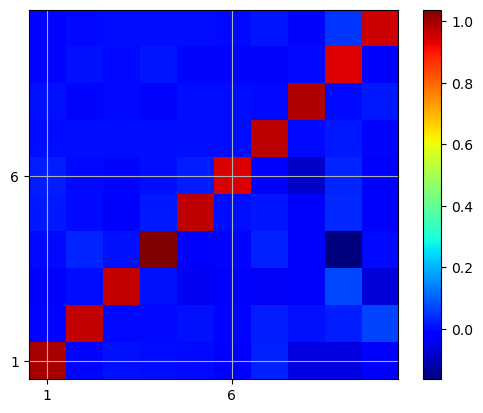

In [18]:
#endmode = 27
xtalk_sqaure = xtalk[:endmode, :endmode]
plt.imshow(xtalk_sqaure, origin='lower')
rows, cols = xtalk_sqaure.shape
i = 5
plt.xticks(ticks=np.arange(0,cols,i), labels=np.arange(1, cols + 1,i))
plt.yticks(ticks=np.arange(0,rows,i), labels=np.arange(1, rows + 1,i))
plt.grid()
plt.colorbar();

 1, +0.019,  6
 2, +0.029,  4
 3, -0.022,  5
 4, +0.014,  5
 5, -0.041,  3
 6, -0.032,  3
 7, -0.034,  3
 8, -0.085,  6
 9, -0.164,  4
10, +0.068,  2


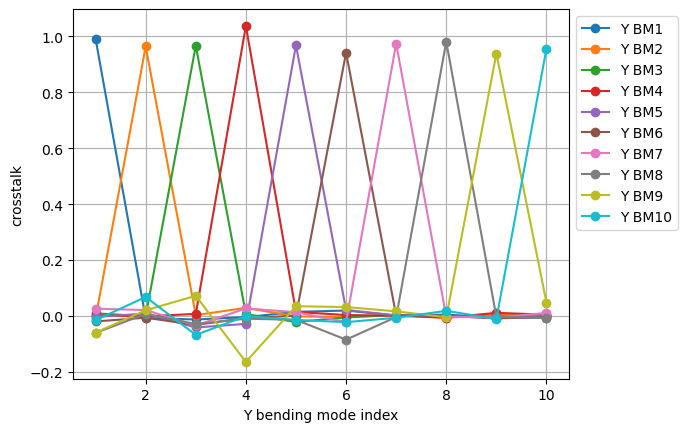

In [20]:
aa = xtalk_sqaure.copy()
np.fill_diagonal(aa,0)
thres = 0.00
maxx = np.zeros(endmode)
contamiID = np.zeros(endmode, dtype=int)
for modeID in range(startmode, endmode+1):
    labelstr = ''
    contamiID[modeID-1] = np.argmax(np.abs(aa[:, modeID-1]))+1 #this is modeID, starts at 1
    maxx[modeID-1] = aa[contamiID[modeID-1]-1, modeID-1]
    if (np.abs(maxx[modeID-1])>thres):
        labelstr = 'Y BM%d'%modeID
        print('%2d, %+.3f, %2d'%(modeID, maxx[modeID-1], contamiID[modeID-1]  ))
    plt.plot(range(1,endmode+1),xtalk_sqaure[:,modeID-1],'-o', label=labelstr);
    
#plt.legend(title='Modes with xtalk > %.2f'%thres)#, loc='lower right')
plt.legend(bbox_to_anchor=(1, 1))#, loc='lower right')
#plt.title()
#plt.plot(range(1,nfitmode+1),xtalk,'-o');
plt.grid()
plt.xlabel('Y bending mode index')
plt.ylabel('crosstalk');

In [23]:
np.savetxt('../model_data/GMTY_xtalk_square.txt', xtalk_sqaure)
#xtalk_sqaure_prev = np.loadtxt('../model_data/GMTY_xtalk_square.txt')

Y Bending Mode 4, Scaling =1.038, Residual RMS = 0.077 micron (per 1 micron RMS expected)
Y Bending Mode 9, Scaling =0.939, Residual RMS = 0.271 micron (per 1 micron RMS expected)


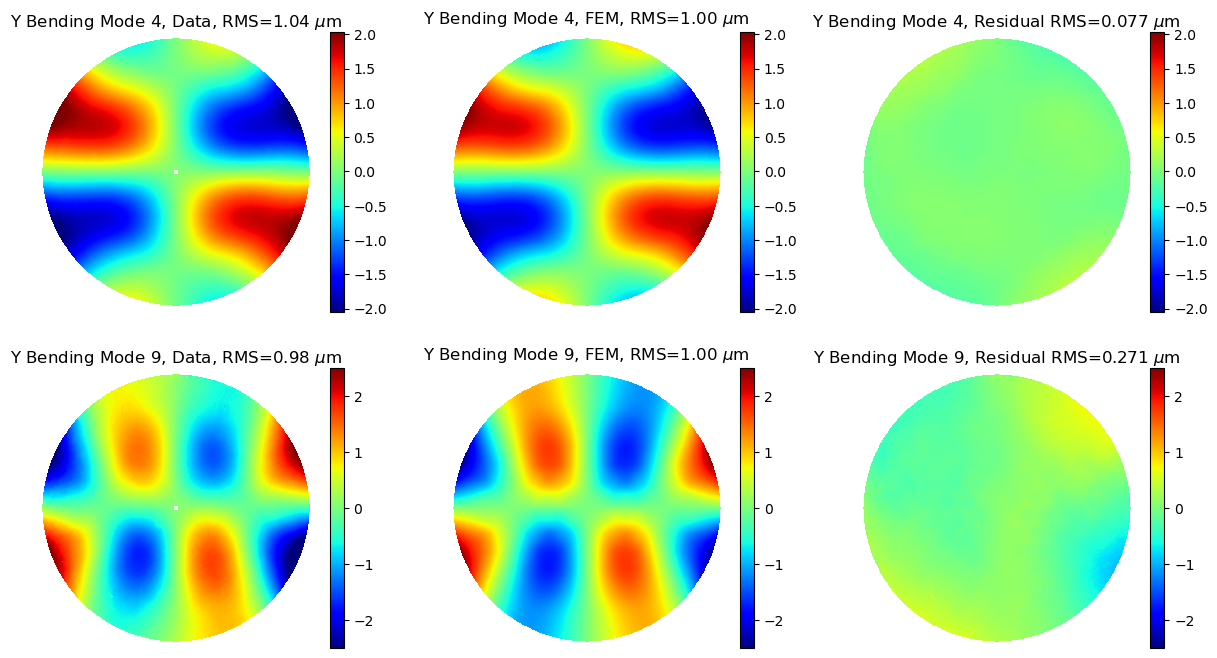

In [28]:
#make plots for the final report
xtalk = np.zeros((nfitmode, endmode))

nrow = 2
fig, ax = plt.subplots(nrow,3,figsize=(15,4*nrow))

for irow, modeID in enumerate([4,9]):

    #--------------FEM
    icol =1 
    aa = UMat[:,modeID-1]
    m1rms = np.std(aa[~np.isnan(aa)])
    grid_z = griddata((nodex, nodey), UyMat[:,modeID-1], (x1,y1), method='linear')
    
    img = ax[irow][icol].imshow(grid_z, origin='lower')
    
    ax[irow][icol].set_title(r'Y Bending Mode %d, FEM, RMS=%.2f $\mu$m'%(modeID,m1rms))
    ax[irow][icol].axis('equal')
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].axis('off')
    #-----------------data
    icol  = 0
    m1s = myBM[:,:,modeID-startmode]
    m1rms = np.std(m1s[~np.isnan(m1s)])

    img = ax[irow][icol].imshow(m1s, origin='lower', vmin=np.nanmin(grid_z), vmax=np.nanmax(grid_z))
    fig.colorbar(img, ax=ax[irow][icol])
    mytitle = r'Y Bending Mode %d, Data, RMS=%.2f $\mu$m'%(modeID, m1rms)
    ax[irow][icol].set_title(mytitle)
    ax[irow][icol].axis('off')
    
    #---------------residual
    icol = 2
    bm2d = np.squeeze(myBM[:,:,modeID-1-startmode+1]) #myIF is already in M1B, in nm
    mask = ~np.isnan(bm2d)

    interp = LinearNDInterpolator(list(zip(x1[mask], y1[mask])), bm2d[mask], fill_value=np.nan)
    mapOntoGMTFEgrid = interp(nodex, nodey).ravel()
    validIdx = ~np.isnan(mapOntoGMTFEgrid)
    xtalk[:,modeID-1] = UyMat[validIdx,:nfitmode].transpose() /np.sum(validIdx)  @ mapOntoGMTFEgrid[validIdx] #all in micron
    #residual = mapOntoGMTFEgrid - UMat[:,:nfitmode] @ xtalk[:, modeID-1] #this is residual in micron
    #only subtract that one mode
    residual = mapOntoGMTFEgrid - UyMat[:,modeID-1] * xtalk[modeID-1, modeID-1] #this is residual in micron
    
    m1rms = np.std(residual[~np.isnan(residual)]) #in micron
    mytitle = r'Y Bending Mode %d, Scaling =%.3f, Residual RMS = %.3f micron (per 1 micron RMS expected)'%(modeID, 
                                                                        np.max(xtalk[:,modeID-1]),
                                                                        m1rms)
    print(mytitle)
    residual[np.isnan(residual)] = 0

    grid_residual = griddata((nodex, nodey), residual, (x1,y1), method='linear')#, fill_value=0)

    img = ax[irow][icol].imshow(grid_residual, origin='lower', vmin=np.nanmin(grid_z), vmax=np.nanmax(grid_z))
    fig.colorbar(img, ax=ax[irow][icol])
    mytitle = r'Y Bending Mode %d, Residual RMS=%.3f $\mu$m'%(modeID, m1rms)
    ax[irow][icol].axis('off')
    ax[irow][icol].set_title(mytitle)